In [38]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV 

import matplotlib.pylab as plt
%matplotlib inline

In [4]:
kagTrainDat = pd.read_csv('~/Documents/git/DataMining/train.csv')
kagTestDat = pd.read_csv('~/Documents/git/DataMining/test.csv')

In [30]:
def modelfit(alg, X_train, y_train, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictors].values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics="auc", early_stopping_rounds=early_stopping_rounds, verbose_eval=500)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train[predictors], y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictors])
    dtrain_predprob = alg.predict_proba(X_train[predictors])[:,1]
        
    #Print model report:
    #print (cvresult)
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train.values,dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train,dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [31]:
kagTrainDat.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [32]:
kagTestDat.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [33]:
y_train = kagTrainDat['ACTION']
X_train = kagTrainDat.ix[:, kagTrainDat.columns != 'ACTION']

X_test = kagTestDat.ix[:, kagTestDat.columns != 'id']

Will train until cv error hasn't decreased in 50 rounds.
/usr/local/lib/python3.5/site-packages/xgboost-0.4-py3.5.egg/xgboost/training.py:270: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  idset = [randidx[(i * kstep): min(len(randidx), (i + 1) * kstep)] for i in range(nfold)]
[0]	cv-test-auc:0.624009+0.009532923811716922	cv-train-auc:0.6529736+0.007525845031622675



Model Report
Accuracy : 0.9758
AUC Score (Train): 0.990687


Stopping. Best iteration:
[299] cv-mean:0.8424044	cv-std:0.011659739441342609


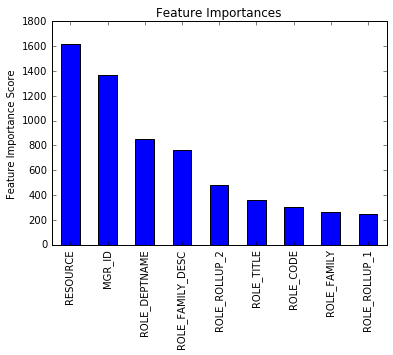

In [39]:
predictors = np.delete(kagTrainDat.columns.get_values(), 0)

gbm = xgb.XGBClassifier(nthread=2, n_estimators=1000,  max_depth=5, objective= 'binary:logistic', learning_rate=0.3)

modelfit(gbm, X_train, y_train, predictors)

In [48]:
param_test1 = {
    'max_depth':list(range(3,10,2)),
    'min_child_weight':list(range(1,6,2))
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.3, n_estimators=299, max_depth=5,min_child_weight=1, gamma=0,objective= 'binary:logistic', nthread=2, scale_pos_weight=1), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



KeyboardInterrupt: 

In [ ]:
gbm.fit(X_train, y_train)

In [38]:
y_test = gbm.predict(X_test)

In [42]:
submission = pd.Series(data=y_test, name='Action', index=kagTestDat['id'])

submission.to_csv("~/Documents/git/DataMining/submission_xgboost.csv",index=True,sep=',', header=True,)